In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("final_merged_data_aug21.csv")

In [4]:
df.head()

,weekind,prot,fat,carbs,kcal,runs,gyms,weight_begin,weight_end,week_explicit_name,comment
0,2,98,79,348,2271,2,0,93.5,93.8,11-17 янв,NaN
1,3,108,91,325,2398,2,0,94.3,94.1,18-24 янв,NaN
2,4,99,103,272,2398,1,3,94.1,94.7,25-31 янв,NaN
3,5,106,97,262,2290,1,1,94.7,94.2,1-7 фев,NaN
4,6,88,61,236,1770,2,1,94.2,93.1,8-14 фев,NaN


In [6]:
df['weight_change'] = df.apply(lambda x: x['weight_end'] - x['weight_begin'], axis = 1)

In [7]:
df.head()

,weekind,prot,fat,carbs,kcal,runs,gyms,weight_begin,weight_end,week_explicit_name,comment,weight_change
0,2,98,79,348,2271,2,0,93.5,93.8,11-17 янв,NaN,0.3
1,3,108,91,325,2398,2,0,94.3,94.1,18-24 янв,NaN,-0.2
2,4,99,103,272,2398,1,3,94.1,94.7,25-31 янв,NaN,0.6
3,5,106,97,262,2290,1,1,94.7,94.2,1-7 фев,NaN,-0.5
4,6,88,61,236,1770,2,1,94.2,93.1,8-14 фев,NaN,-1.1


In [9]:
df[df['weight_change']<-0.5]

,weekind,prot,fat,carbs,kcal,runs,gyms,weight_begin,weight_end,week_explicit_name,comment,weight_change
4,6,88,61,236,1770,2,1,94.2,93.10,8-14 фев,NaN,-1.10
7,9,88,92,223,1962,3,1,93.8,93.00,1-7 марта,NaN,-0.80
8,10,111,65,290,2005,2,1,93.0,92.40,8-14 марта,NaN,-0.60
9,11,94,74,228,1930,3,1,92.4,91.55,15-21 марта,NaN,-0.85
13,15,69,72,234,1931,3,1,91.4,90.50,12-18 апр,15 км сам на выхах,-0.90
14,16,76,79,175,1738,3,1,90.5,89.30,19-25 апр,NaN,-1.20
17,19,66,68,247,1912,3,0,90.3,89.00,10-16 мая,половинка,-1.30
22,25,64,69,184,1493,0,0,89.0,87.60,21-27 июн,NaN,-1.40
24,27,74,92,214,2039,0,0,87.8,87.10,5-11 июл,NaN,-0.70


Plot dependencies

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [145]:
# THRESHOLD = 1
THRESHOLD = 0.75


df_optimal = df[df['weight_change']<-THRESHOLD]
df_NON_optimal = df[df['weight_change']>THRESHOLD]
len(df_optimal),len(df_NON_optimal)

(7, 2)

<AxesSubplot:>

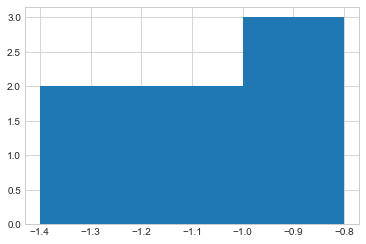

In [146]:
df_optimal['weight_change'].hist(bins = 3)

In [150]:
df_optimal

,weekind,prot,fat,carbs,kcal,runs,gyms,weight_begin,weight_end,week_explicit_name,comment,weight_change
4,6,88,61,236,1770,2,1,94.2,93.10,8-14 фев,NaN,-1.10
7,9,88,92,223,1962,3,1,93.8,93.00,1-7 марта,NaN,-0.80
9,11,94,74,228,1930,3,1,92.4,91.55,15-21 марта,NaN,-0.85
13,15,69,72,234,1931,3,1,91.4,90.50,12-18 апр,15 км сам на выхах,-0.90
14,16,76,79,175,1738,3,1,90.5,89.30,19-25 апр,NaN,-1.20
17,19,66,68,247,1912,3,0,90.3,89.00,10-16 мая,половинка,-1.30
22,25,64,69,184,1493,0,0,89.0,87.60,21-27 июн,NaN,-1.40


In [147]:
optimal_calories_list = df_optimal['kcal'].tolist()
optimal_runs_list = df_optimal['runs'].tolist()

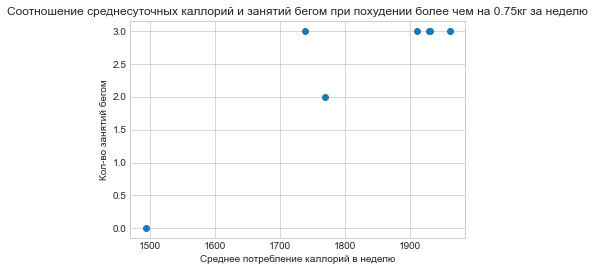

In [148]:
plt.title("Соотношение среднесуточных каллорий и занятий бегом при похудении более чем на {}кг за неделю".format(THRESHOLD))
plt.xlabel("Среднее потребление каллорий в неделю")
plt.ylabel("Кол-во занятий бегом")
plt.plot(optimal_calories_list, optimal_runs_list, 'o');

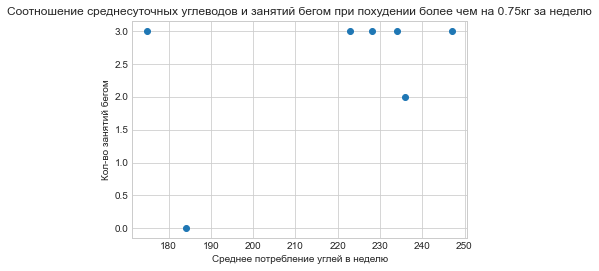

In [149]:
optimal_carbs_list = df_optimal['carbs'].tolist()
plt.title("Соотношение среднесуточных углеводов и занятий бегом при похудении более чем на {}кг за неделю".format(THRESHOLD))
plt.xlabel("Среднее потребление углей в неделю")
plt.ylabel("Кол-во занятий бегом")
plt.plot(optimal_carbs_list, optimal_runs_list, 'o');

In [98]:
NON_optimal_calories_list = df_NON_optimal['kcal'].tolist()
NON_optimal_runs_list = df_NON_optimal['runs'].tolist()

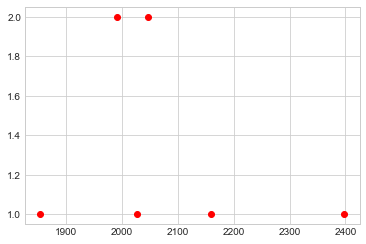

In [99]:
plt.plot(NON_optimal_calories_list, NON_optimal_runs_list, 'o', color = 'red');

LogReg

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
df.head()

,weekind,prot,fat,carbs,kcal,runs,gyms,weight_begin,weight_end,week_explicit_name,comment,weight_change
0,2,98,79,348,2271,2,0,93.5,93.8,11-17 янв,NaN,0.3
1,3,108,91,325,2398,2,0,94.3,94.1,18-24 янв,NaN,-0.2
2,4,99,103,272,2398,1,3,94.1,94.7,25-31 янв,NaN,0.6
3,5,106,97,262,2290,1,1,94.7,94.2,1-7 фев,NaN,-0.5
4,6,88,61,236,1770,2,1,94.2,93.1,8-14 фев,NaN,-1.1


In [56]:
reg = LinearRegression()

In [46]:
X = df[['runs','kcal']].values
y = df['weight_change'].to_numpy()

In [50]:
reg.fit(X,y)

LinearRegression()

In [51]:
reg.score(X, y)

0.21035746195680893

In [57]:
y_adj = [0 if el > -0.3 and el < 0.3 else el for el in y]
y_adj[:3]

[0, 0, 0.6000000000000085]

In [60]:
reg = LinearRegression().fit(X,y_adj)
reg.score(X, y_adj), reg.coef_

(0.21267388329978032, array([-0.19332016,  0.00129151]))

In [103]:
y_class = [0 if el <0 else 1 for el in y]
y_class

[1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0]

In [104]:
from sklearn.linear_model import LogisticRegression

In [112]:
clf = LogisticRegression(random_state=0).fit(X, y_class)

In [113]:
clf.score(X, y_class)

0.6896551724137931

In [124]:
importance

[-0.695666753333331, 0.0005270924357564642]

In [125]:
importance = clf.coef_[0].tolist()
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: {}, Score: {}'.format(i,v))

Feature: 0, Score: -0.695666753333331
Feature: 1, Score: 0.0005270924357564642


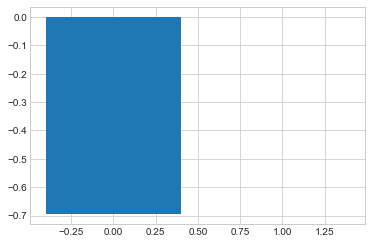

In [126]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [108]:
X_more_feat = df[['prot','fat','carbs','runs','kcal']].values

In [109]:
clf = LogisticRegression(random_state=0).fit(X_more_feat, y_class)

In [110]:
clf.score(X_more_feat, y_class)

0.6551724137931034